In [38]:
from glob import glob
import cv2
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Input, Flatten
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(42)

In [39]:
X_train = np.array(glob("Train/*"))
X_test = np.array(glob("Validation/*"))
print(X_train.shape)
print(X_test.shape)

(891,)
(4,)


In [40]:
train = []
y_train = []
for img_path in X_train:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    train.append(img)
    grayimg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    y_train.append(grayimg.reshape([grayimg.shape[0],grayimg.shape[1],1]))
X_train = np.array(train)
y_train = np.array(y_train)
print(y_train.shape)

(891,)


In [41]:
test = []
y_test = []
for img_path in X_test:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test.append(img)
    grayimg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    y_test.append(grayimg.reshape([grayimg.shape[0],grayimg.shape[1],1]))
X_test = np.array(test)
y_test = np.array(y_test)
print(y_test.shape)

(4,)


In [42]:
def GreyModel(input_shape):
    X_input = Input(input_shape)
    X = Conv2D(filters = 1, kernel_size = (1, 1), strides = (1,1), padding = 'same',activation='relu')(X_input)
    model = Model(inputs = X_input, outputs = X, name='digModel')

    return model

In [43]:
model = GreyModel(input_shape = [None,None,3])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 1)     4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss='mean_squared_error',
              optimizer='adam')


In [45]:
prevloss = 0
currloss = 100
epsilon = 1e-3
print(epsilon)
while abs(currloss-prevloss) > epsilon:
    prevloss = currloss
    for i in range(X_train.shape[0]):
        X = X_train[0]
        Y = y_train[0]
        X = X.reshape([1,X.shape[0],X.shape[1],3])
        Y = Y.reshape([1,Y.shape[0],Y.shape[1],1])
        hist = model.fit(X, Y, epochs=1)
        currloss = list(hist.history.values())[0][0]

0.001
Epoch 1/1
1/1 [==============================] - 0s - loss: 32472.4277
Epoch 1/1
1/1 [==============================] - 0s - loss: 32366.4375
Epoch 1/1
1/1 [==============================] - 0s - loss: 32244.3848
Epoch 1/1
1/1 [==============================] - 0s - loss: 32115.3281
Epoch 1/1
1/1 [==============================] - 0s - loss: 31982.4473
Epoch 1/1
1/1 [==============================] - 0s - loss: 31847.2715
Epoch 1/1
1/1 [==============================] - 0s - loss: 31710.6289
Epoch 1/1
1/1 [==============================] - 0s - loss: 31573.0371
Epoch 1/1
1/1 [==============================] - 0s - loss: 31434.8301
Epoch 1/1
1/1 [==============================] - 0s - loss: 31296.2480
Epoch 1/1
1/1 [==============================] - 0s - loss: 31157.4570
Epoch 1/1
1/1 [==============================] - 0s - loss: 31018.5879
Epoch 1/1
1/1 [==============================] - 0s - loss: 30879.7402
Epoch 1/1
1/1 [==============================] - 0s - loss: 30740.9785


1/1 [==============================] - 0s - loss: 18820.0312
Epoch 1/1
1/1 [==============================] - 0s - loss: 18725.2949
Epoch 1/1
1/1 [==============================] - 0s - loss: 18630.9492
Epoch 1/1
1/1 [==============================] - 0s - loss: 18536.9961
Epoch 1/1
1/1 [==============================] - 0s - loss: 18443.4258
Epoch 1/1
1/1 [==============================] - 0s - loss: 18350.2520
Epoch 1/1
1/1 [==============================] - 0s - loss: 18257.4609
Epoch 1/1
1/1 [==============================] - 0s - loss: 18165.0586
Epoch 1/1
1/1 [==============================] - 0s - loss: 18073.0449
Epoch 1/1
1/1 [==============================] - 0s - loss: 17981.4121
Epoch 1/1
1/1 [==============================] - 0s - loss: 17890.1621
Epoch 1/1
1/1 [==============================] - 0s - loss: 17799.2988
Epoch 1/1
1/1 [==============================] - 0s - loss: 17708.8125
Epoch 1/1
1/1 [==============================] - 0s - loss: 17618.7070
Epoch 1/1
1/1 [=

1/1 [==============================] - 0s - loss: 10236.3994
Epoch 1/1
1/1 [==============================] - 0s - loss: 10179.9688
Epoch 1/1
1/1 [==============================] - 0s - loss: 10123.8164
Epoch 1/1
1/1 [==============================] - 0s - loss: 10067.9404
Epoch 1/1
1/1 [==============================] - 0s - loss: 10012.3369
Epoch 1/1
1/1 [==============================] - 0s - loss: 9957.0078
Epoch 1/1
1/1 [==============================] - 0s - loss: 9901.9492
Epoch 1/1
1/1 [==============================] - 0s - loss: 9847.1660
Epoch 1/1
1/1 [==============================] - 0s - loss: 9792.6504
Epoch 1/1
1/1 [==============================] - 0s - loss: 9738.4053
Epoch 1/1
1/1 [==============================] - 0s - loss: 9684.4297
Epoch 1/1
1/1 [==============================] - 0s - loss: 9630.7207
Epoch 1/1
1/1 [==============================] - 0s - loss: 9577.2812
Epoch 1/1
1/1 [==============================] - 0s - loss: 9524.1035
Epoch 1/1
1/1 [==========

1/1 [==============================] - 0s - loss: 5274.0630
Epoch 1/1
1/1 [==============================] - 0s - loss: 5243.9272
Epoch 1/1
1/1 [==============================] - 0s - loss: 5213.9678
Epoch 1/1
1/1 [==============================] - 0s - loss: 5184.1816
Epoch 1/1
1/1 [==============================] - 0s - loss: 5154.5728
Epoch 1/1
1/1 [==============================] - 0s - loss: 5125.1353
Epoch 1/1
1/1 [==============================] - 0s - loss: 5095.8696
Epoch 1/1
1/1 [==============================] - 0s - loss: 5066.7783
Epoch 1/1
1/1 [==============================] - 0s - loss: 5037.8564
Epoch 1/1
1/1 [==============================] - 0s - loss: 5009.1060
Epoch 1/1
1/1 [==============================] - 0s - loss: 4980.5225
Epoch 1/1
1/1 [==============================] - 0s - loss: 4952.1113
Epoch 1/1
1/1 [==============================] - 0s - loss: 4923.8652
Epoch 1/1
1/1 [==============================] - 0s - loss: 4895.7891
Epoch 1/1
1/1 [===============

1/1 [==============================] - 0s - loss: 2754.1416
Epoch 1/1
1/1 [==============================] - 0s - loss: 2739.8235
Epoch 1/1
1/1 [==============================] - 0s - loss: 2725.6050
Epoch 1/1
1/1 [==============================] - 0s - loss: 2711.4829
Epoch 1/1
1/1 [==============================] - 0s - loss: 2697.4590
Epoch 1/1
1/1 [==============================] - 0s - loss: 2683.5320
Epoch 1/1
1/1 [==============================] - 0s - loss: 2669.7004
Epoch 1/1
1/1 [==============================] - 0s - loss: 2655.9634
Epoch 1/1
1/1 [==============================] - 0s - loss: 2642.3232
Epoch 1/1
1/1 [==============================] - 0s - loss: 2628.7769
Epoch 1/1
1/1 [==============================] - 0s - loss: 2615.3242
Epoch 1/1
1/1 [==============================] - 0s - loss: 2601.9653
Epoch 1/1
1/1 [==============================] - 0s - loss: 2588.6995
Epoch 1/1
1/1 [==============================] - 0s - loss: 2575.5256
Epoch 1/1
1/1 [===============

1/1 [==============================] - 0s - loss: 1618.1854
Epoch 1/1
1/1 [==============================] - 0s - loss: 1612.1604
Epoch 1/1
1/1 [==============================] - 0s - loss: 1606.1826
Epoch 1/1
1/1 [==============================] - 0s - loss: 1600.2515
Epoch 1/1
1/1 [==============================] - 0s - loss: 1594.3668
Epoch 1/1
1/1 [==============================] - 0s - loss: 1588.5280
Epoch 1/1
1/1 [==============================] - 0s - loss: 1582.7363
Epoch 1/1
1/1 [==============================] - 0s - loss: 1576.9899
Epoch 1/1
1/1 [==============================] - 0s - loss: 1571.2887
Epoch 1/1
1/1 [==============================] - 0s - loss: 1565.6321
Epoch 1/1
1/1 [==============================] - 0s - loss: 1560.0206
Epoch 1/1
1/1 [==============================] - 0s - loss: 1554.4539
Epoch 1/1
1/1 [==============================] - 0s - loss: 1548.9308
Epoch 1/1
1/1 [==============================] - 0s - loss: 1543.4520
Epoch 1/1
1/1 [===============

1/1 [==============================] - 0s - loss: 1160.7485
Epoch 1/1
1/1 [==============================] - 0s - loss: 1158.4404
Epoch 1/1
1/1 [==============================] - 0s - loss: 1156.1516
Epoch 1/1
1/1 [==============================] - 0s - loss: 1153.8820
Epoch 1/1
1/1 [==============================] - 0s - loss: 1151.6313
Epoch 1/1
1/1 [==============================] - 0s - loss: 1149.3989
Epoch 1/1
1/1 [==============================] - 0s - loss: 1147.1859
Epoch 1/1
1/1 [==============================] - 0s - loss: 1144.9906
Epoch 1/1
1/1 [==============================] - 0s - loss: 1142.8140
Epoch 1/1
1/1 [==============================] - 0s - loss: 1140.6555
Epoch 1/1
1/1 [==============================] - 0s - loss: 1138.5148
Epoch 1/1
1/1 [==============================] - 0s - loss: 1136.3922
Epoch 1/1
1/1 [==============================] - 0s - loss: 1134.2871
Epoch 1/1
1/1 [==============================] - 0s - loss: 1132.1996
Epoch 1/1
1/1 [===============

1/1 [==============================] - 0s - loss: 986.6521
Epoch 1/1
1/1 [==============================] - 0s - loss: 985.7498
Epoch 1/1
1/1 [==============================] - 0s - loss: 984.8542
Epoch 1/1
1/1 [==============================] - 0s - loss: 983.9648
Epoch 1/1
1/1 [==============================] - 0s - loss: 983.0822
Epoch 1/1
1/1 [==============================] - 0s - loss: 982.2057
Epoch 1/1
1/1 [==============================] - 0s - loss: 981.3356
Epoch 1/1
1/1 [==============================] - 0s - loss: 980.4716
Epoch 1/1
1/1 [==============================] - 0s - loss: 979.6137
Epoch 1/1
1/1 [==============================] - 0s - loss: 978.7623
Epoch 1/1
1/1 [==============================] - 0s - loss: 977.9166
Epoch 1/1
1/1 [==============================] - 0s - loss: 977.0768
Epoch 1/1
1/1 [==============================] - 0s - loss: 976.2433
Epoch 1/1
1/1 [==============================] - 0s - loss: 975.4153
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 911.5739
Epoch 1/1
1/1 [==============================] - 0s - loss: 911.1149
Epoch 1/1
1/1 [==============================] - 0s - loss: 910.6577
Epoch 1/1
1/1 [==============================] - 0s - loss: 910.2023
Epoch 1/1
1/1 [==============================] - 0s - loss: 909.7485
Epoch 1/1
1/1 [==============================] - 0s - loss: 909.2965
Epoch 1/1
1/1 [==============================] - 0s - loss: 908.8462
Epoch 1/1
1/1 [==============================] - 0s - loss: 908.3975
Epoch 1/1
1/1 [==============================] - 0s - loss: 907.9506
Epoch 1/1
1/1 [==============================] - 0s - loss: 907.5052
Epoch 1/1
1/1 [==============================] - 0s - loss: 907.0617
Epoch 1/1
1/1 [==============================] - 0s - loss: 906.6196
Epoch 1/1
1/1 [==============================] - 0s - loss: 906.1790
Epoch 1/1
1/1 [==============================] - 0s - loss: 905.7402
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 865.3911
Epoch 1/1
1/1 [==============================] - 0s - loss: 865.0403
Epoch 1/1
1/1 [==============================] - 0s - loss: 864.6901
Epoch 1/1
1/1 [==============================] - 0s - loss: 864.3403
Epoch 1/1
1/1 [==============================] - 0s - loss: 863.9907
Epoch 1/1
1/1 [==============================] - 0s - loss: 863.6414
Epoch 1/1
1/1 [==============================] - 0s - loss: 863.2925
Epoch 1/1
1/1 [==============================] - 0s - loss: 862.9437
Epoch 1/1
1/1 [==============================] - 0s - loss: 862.5956
Epoch 1/1
1/1 [==============================] - 0s - loss: 862.2474
Epoch 1/1
1/1 [==============================] - 0s - loss: 861.9000
Epoch 1/1
1/1 [==============================] - 0s - loss: 861.5524
Epoch 1/1
1/1 [==============================] - 0s - loss: 861.2053
Epoch 1/1
1/1 [==============================] - 0s - loss: 860.8584
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 825.3062
Epoch 1/1
1/1 [==============================] - 0s - loss: 824.9709
Epoch 1/1
1/1 [==============================] - 0s - loss: 824.6354
Epoch 1/1
1/1 [==============================] - 0s - loss: 824.3003
Epoch 1/1
1/1 [==============================] - 0s - loss: 823.9650
Epoch 1/1
1/1 [==============================] - 0s - loss: 823.6296
Epoch 1/1
1/1 [==============================] - 0s - loss: 823.2942
Epoch 1/1
1/1 [==============================] - 0s - loss: 822.9590
Epoch 1/1
1/1 [==============================] - 0s - loss: 822.6237
Epoch 1/1
1/1 [==============================] - 0s - loss: 822.2882
Epoch 1/1
1/1 [==============================] - 0s - loss: 821.9529
Epoch 1/1
1/1 [==============================] - 0s - loss: 821.6176
Epoch 1/1
1/1 [==============================] - 0s - loss: 821.2821
Epoch 1/1
1/1 [==============================] - 0s - loss: 820.9467
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 785.5281
Epoch 1/1
1/1 [==============================] - 0s - loss: 785.1880
Epoch 1/1
1/1 [==============================] - 0s - loss: 784.8481
Epoch 1/1
1/1 [==============================] - 0s - loss: 784.5079
Epoch 1/1
1/1 [==============================] - 0s - loss: 784.1678
Epoch 1/1
1/1 [==============================] - 0s - loss: 783.8277
Epoch 1/1
1/1 [==============================] - 0s - loss: 783.4873
Epoch 1/1
1/1 [==============================] - 0s - loss: 783.1469
Epoch 1/1
1/1 [==============================] - 0s - loss: 782.8066
Epoch 1/1
1/1 [==============================] - 0s - loss: 782.4661
Epoch 1/1
1/1 [==============================] - 0s - loss: 782.1259
Epoch 1/1
1/1 [==============================] - 0s - loss: 781.7851
Epoch 1/1
1/1 [==============================] - 0s - loss: 781.4443
Epoch 1/1
1/1 [==============================] - 0s - loss: 781.1039
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 745.0184
Epoch 1/1
1/1 [==============================] - 0s - loss: 744.6717
Epoch 1/1
1/1 [==============================] - 0s - loss: 744.3252
Epoch 1/1
1/1 [==============================] - 0s - loss: 743.9785
Epoch 1/1
1/1 [==============================] - 0s - loss: 743.6319
Epoch 1/1
1/1 [==============================] - 0s - loss: 743.2852
Epoch 1/1
1/1 [==============================] - 0s - loss: 742.9384
Epoch 1/1
1/1 [==============================] - 0s - loss: 742.5915
Epoch 1/1
1/1 [==============================] - 0s - loss: 742.2446
Epoch 1/1
1/1 [==============================] - 0s - loss: 741.8979
Epoch 1/1
1/1 [==============================] - 0s - loss: 741.5510
Epoch 1/1
1/1 [==============================] - 0s - loss: 741.2040
Epoch 1/1
1/1 [==============================] - 0s - loss: 740.8569
Epoch 1/1
1/1 [==============================] - 0s - loss: 740.5098
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 703.8294
Epoch 1/1
1/1 [==============================] - 0s - loss: 703.4783
Epoch 1/1
1/1 [==============================] - 0s - loss: 703.1268
Epoch 1/1
1/1 [==============================] - 0s - loss: 702.7756
Epoch 1/1
1/1 [==============================] - 0s - loss: 702.4244
Epoch 1/1
1/1 [==============================] - 0s - loss: 702.0728
Epoch 1/1
1/1 [==============================] - 0s - loss: 701.7215
Epoch 1/1
1/1 [==============================] - 0s - loss: 701.3700
Epoch 1/1
1/1 [==============================] - 0s - loss: 701.0184
Epoch 1/1
1/1 [==============================] - 0s - loss: 700.6671
Epoch 1/1
1/1 [==============================] - 0s - loss: 700.3156
Epoch 1/1
1/1 [==============================] - 0s - loss: 699.9641
Epoch 1/1
1/1 [==============================] - 0s - loss: 699.6124
Epoch 1/1
1/1 [==============================] - 0s - loss: 699.2608
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 662.2195
Epoch 1/1
1/1 [==============================] - 0s - loss: 661.8659
Epoch 1/1
1/1 [==============================] - 0s - loss: 661.5123
Epoch 1/1
1/1 [==============================] - 0s - loss: 661.1585
Epoch 1/1
1/1 [==============================] - 0s - loss: 660.8051
Epoch 1/1
1/1 [==============================] - 0s - loss: 660.4514
Epoch 1/1
1/1 [==============================] - 0s - loss: 660.0976
Epoch 1/1
1/1 [==============================] - 0s - loss: 659.7440
Epoch 1/1
1/1 [==============================] - 0s - loss: 659.3903
Epoch 1/1
1/1 [==============================] - 0s - loss: 659.0367
Epoch 1/1
1/1 [==============================] - 0s - loss: 658.6830
Epoch 1/1
1/1 [==============================] - 0s - loss: 658.3292
Epoch 1/1
1/1 [==============================] - 0s - loss: 657.9757
Epoch 1/1
1/1 [==============================] - 0s - loss: 657.6219
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 620.4747
Epoch 1/1
1/1 [==============================] - 0s - loss: 620.1212
Epoch 1/1
1/1 [==============================] - 0s - loss: 619.7676
Epoch 1/1
1/1 [==============================] - 0s - loss: 619.4141
Epoch 1/1
1/1 [==============================] - 0s - loss: 619.0607
Epoch 1/1
1/1 [==============================] - 0s - loss: 618.7073
Epoch 1/1
1/1 [==============================] - 0s - loss: 618.3536
Epoch 1/1
1/1 [==============================] - 0s - loss: 618.0002
Epoch 1/1
1/1 [==============================] - 0s - loss: 617.6468
Epoch 1/1
1/1 [==============================] - 0s - loss: 617.2935
Epoch 1/1
1/1 [==============================] - 0s - loss: 616.9398
Epoch 1/1
1/1 [==============================] - 0s - loss: 616.5865
Epoch 1/1
1/1 [==============================] - 0s - loss: 616.2331
Epoch 1/1
1/1 [==============================] - 0s - loss: 615.8798
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 578.8801
Epoch 1/1
1/1 [==============================] - 0s - loss: 578.5289
Epoch 1/1
1/1 [==============================] - 0s - loss: 578.1780
Epoch 1/1
1/1 [==============================] - 0s - loss: 577.8271
Epoch 1/1
1/1 [==============================] - 0s - loss: 577.4760
Epoch 1/1
1/1 [==============================] - 0s - loss: 577.1252
Epoch 1/1
1/1 [==============================] - 0s - loss: 576.7741
Epoch 1/1
1/1 [==============================] - 0s - loss: 576.4235
Epoch 1/1
1/1 [==============================] - 0s - loss: 576.0725
Epoch 1/1
1/1 [==============================] - 0s - loss: 575.7217
Epoch 1/1
1/1 [==============================] - 0s - loss: 575.3708
Epoch 1/1
1/1 [==============================] - 0s - loss: 575.0203
Epoch 1/1
1/1 [==============================] - 0s - loss: 574.6695
Epoch 1/1
1/1 [==============================] - 0s - loss: 574.3189
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 537.7135
Epoch 1/1
1/1 [==============================] - 0s - loss: 537.3671
Epoch 1/1
1/1 [==============================] - 0s - loss: 537.0209
Epoch 1/1
1/1 [==============================] - 0s - loss: 536.6749
Epoch 1/1
1/1 [==============================] - 0s - loss: 536.3286
Epoch 1/1
1/1 [==============================] - 0s - loss: 535.9825
Epoch 1/1
1/1 [==============================] - 0s - loss: 535.6366
Epoch 1/1
1/1 [==============================] - 0s - loss: 535.2905
Epoch 1/1
1/1 [==============================] - 0s - loss: 534.9446
Epoch 1/1
1/1 [==============================] - 0s - loss: 534.5988
Epoch 1/1
1/1 [==============================] - 0s - loss: 534.2529
Epoch 1/1
1/1 [==============================] - 0s - loss: 533.9072
Epoch 1/1
1/1 [==============================] - 0s - loss: 533.5615
Epoch 1/1
1/1 [==============================] - 0s - loss: 533.2159
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 497.2413
Epoch 1/1
1/1 [==============================] - 0s - loss: 496.9022
Epoch 1/1
1/1 [==============================] - 0s - loss: 496.5630
Epoch 1/1
1/1 [==============================] - 0s - loss: 496.2237
Epoch 1/1
1/1 [==============================] - 0s - loss: 495.8847
Epoch 1/1
1/1 [==============================] - 0s - loss: 495.5457
Epoch 1/1
1/1 [==============================] - 0s - loss: 495.2068
Epoch 1/1
1/1 [==============================] - 0s - loss: 494.8678
Epoch 1/1
1/1 [==============================] - 0s - loss: 494.5292
Epoch 1/1
1/1 [==============================] - 0s - loss: 494.1905
Epoch 1/1
1/1 [==============================] - 0s - loss: 493.8517
Epoch 1/1
1/1 [==============================] - 0s - loss: 493.5131
Epoch 1/1
1/1 [==============================] - 0s - loss: 493.1746
Epoch 1/1
1/1 [==============================] - 0s - loss: 492.8360
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 457.7174
Epoch 1/1
1/1 [==============================] - 0s - loss: 457.3871
Epoch 1/1
1/1 [==============================] - 0s - loss: 457.0571
Epoch 1/1
1/1 [==============================] - 0s - loss: 456.7269
Epoch 1/1
1/1 [==============================] - 0s - loss: 456.3970
Epoch 1/1
1/1 [==============================] - 0s - loss: 456.0670
Epoch 1/1
1/1 [==============================] - 0s - loss: 455.7373
Epoch 1/1
1/1 [==============================] - 0s - loss: 455.4077
Epoch 1/1
1/1 [==============================] - 0s - loss: 455.0779
Epoch 1/1
1/1 [==============================] - 0s - loss: 454.7485
Epoch 1/1
1/1 [==============================] - 0s - loss: 454.4189
Epoch 1/1
1/1 [==============================] - 0s - loss: 454.0897
Epoch 1/1
1/1 [==============================] - 0s - loss: 453.7605
Epoch 1/1
1/1 [==============================] - 0s - loss: 453.4312
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 419.3773
Epoch 1/1
1/1 [==============================] - 0s - loss: 419.0580
Epoch 1/1
1/1 [==============================] - 0s - loss: 418.7389
Epoch 1/1
1/1 [==============================] - 0s - loss: 418.4197
Epoch 1/1
1/1 [==============================] - 0s - loss: 418.1008
Epoch 1/1
1/1 [==============================] - 0s - loss: 417.7820
Epoch 1/1
1/1 [==============================] - 0s - loss: 417.4633
Epoch 1/1
1/1 [==============================] - 0s - loss: 417.1447
Epoch 1/1
1/1 [==============================] - 0s - loss: 416.8261
Epoch 1/1
1/1 [==============================] - 0s - loss: 416.5077
Epoch 1/1
1/1 [==============================] - 0s - loss: 416.1894
Epoch 1/1
1/1 [==============================] - 0s - loss: 415.8712
Epoch 1/1
1/1 [==============================] - 0s - loss: 415.5533
Epoch 1/1
1/1 [==============================] - 0s - loss: 415.2352
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 382.4366
Epoch 1/1
1/1 [==============================] - 0s - loss: 382.1301
Epoch 1/1
1/1 [==============================] - 0s - loss: 381.8238
Epoch 1/1
1/1 [==============================] - 0s - loss: 381.5174
Epoch 1/1
1/1 [==============================] - 0s - loss: 381.2112
Epoch 1/1
1/1 [==============================] - 0s - loss: 380.9053
Epoch 1/1
1/1 [==============================] - 0s - loss: 380.5993
Epoch 1/1
1/1 [==============================] - 0s - loss: 380.2936
Epoch 1/1
1/1 [==============================] - 0s - loss: 379.9878
Epoch 1/1
1/1 [==============================] - 0s - loss: 379.6821
Epoch 1/1
1/1 [==============================] - 0s - loss: 379.3767
Epoch 1/1
1/1 [==============================] - 0s - loss: 379.0714
Epoch 1/1
1/1 [==============================] - 0s - loss: 378.7662
Epoch 1/1
1/1 [==============================] - 0s - loss: 378.4610
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 347.0881
Epoch 1/1
1/1 [==============================] - 0s - loss: 346.7959
Epoch 1/1
1/1 [==============================] - 0s - loss: 346.5037
Epoch 1/1
1/1 [==============================] - 0s - loss: 346.2117
Epoch 1/1
1/1 [==============================] - 0s - loss: 345.9198
Epoch 1/1
1/1 [==============================] - 0s - loss: 345.6281
Epoch 1/1
1/1 [==============================] - 0s - loss: 345.3363
Epoch 1/1
1/1 [==============================] - 0s - loss: 345.0449
Epoch 1/1
1/1 [==============================] - 0s - loss: 344.7535
Epoch 1/1
1/1 [==============================] - 0s - loss: 344.4623
Epoch 1/1
1/1 [==============================] - 0s - loss: 344.1711
Epoch 1/1
1/1 [==============================] - 0s - loss: 343.8801
Epoch 1/1
1/1 [==============================] - 0s - loss: 343.5893
Epoch 1/1
1/1 [==============================] - 0s - loss: 343.2986
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 313.4977
Epoch 1/1
1/1 [==============================] - 0s - loss: 313.2212
Epoch 1/1
1/1 [==============================] - 0s - loss: 312.9445
Epoch 1/1
1/1 [==============================] - 0s - loss: 312.6681
Epoch 1/1
1/1 [==============================] - 0s - loss: 312.3917
Epoch 1/1
1/1 [==============================] - 0s - loss: 312.1155
Epoch 1/1
1/1 [==============================] - 0s - loss: 311.8394
Epoch 1/1
1/1 [==============================] - 0s - loss: 311.5635
Epoch 1/1
1/1 [==============================] - 0s - loss: 311.2878
Epoch 1/1
1/1 [==============================] - 0s - loss: 311.0121
Epoch 1/1
1/1 [==============================] - 0s - loss: 310.7365
Epoch 1/1
1/1 [==============================] - 0s - loss: 310.4611
Epoch 1/1
1/1 [==============================] - 0s - loss: 310.1860
Epoch 1/1
1/1 [==============================] - 0s - loss: 309.9109
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 281.8033
Epoch 1/1
1/1 [==============================] - 0s - loss: 281.5433
Epoch 1/1
1/1 [==============================] - 0s - loss: 281.2832
Epoch 1/1
1/1 [==============================] - 0s - loss: 281.0233
Epoch 1/1
1/1 [==============================] - 0s - loss: 280.7636
Epoch 1/1
1/1 [==============================] - 0s - loss: 280.5040
Epoch 1/1
1/1 [==============================] - 0s - loss: 280.2446
Epoch 1/1
1/1 [==============================] - 0s - loss: 279.9852
Epoch 1/1
1/1 [==============================] - 0s - loss: 279.7260
Epoch 1/1
1/1 [==============================] - 0s - loss: 279.4670
Epoch 1/1
1/1 [==============================] - 0s - loss: 279.2082
Epoch 1/1
1/1 [==============================] - 0s - loss: 278.9495
Epoch 1/1
1/1 [==============================] - 0s - loss: 278.6909
Epoch 1/1
1/1 [==============================] - 0s - loss: 278.4324
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 252.1114
Epoch 1/1
1/1 [==============================] - 0s - loss: 251.8684
Epoch 1/1
1/1 [==============================] - 0s - loss: 251.6258
Epoch 1/1
1/1 [==============================] - 0s - loss: 251.3833
Epoch 1/1
1/1 [==============================] - 0s - loss: 251.1408
Epoch 1/1
1/1 [==============================] - 0s - loss: 250.8987
Epoch 1/1
1/1 [==============================] - 0s - loss: 250.6566
Epoch 1/1
1/1 [==============================] - 0s - loss: 250.4146
Epoch 1/1
1/1 [==============================] - 0s - loss: 250.1729
Epoch 1/1
1/1 [==============================] - 0s - loss: 249.9312
Epoch 1/1
1/1 [==============================] - 0s - loss: 249.6897
Epoch 1/1
1/1 [==============================] - 0s - loss: 249.4485
Epoch 1/1
1/1 [==============================] - 0s - loss: 249.2073
Epoch 1/1
1/1 [==============================] - 0s - loss: 248.9662
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 224.4971
Epoch 1/1
1/1 [==============================] - 0s - loss: 224.2721
Epoch 1/1
1/1 [==============================] - 0s - loss: 224.0473
Epoch 1/1
1/1 [==============================] - 0s - loss: 223.8225
Epoch 1/1
1/1 [==============================] - 0s - loss: 223.5980
Epoch 1/1
1/1 [==============================] - 0s - loss: 223.3736
Epoch 1/1
1/1 [==============================] - 0s - loss: 223.1494
Epoch 1/1
1/1 [==============================] - 0s - loss: 222.9254
Epoch 1/1
1/1 [==============================] - 0s - loss: 222.7014
Epoch 1/1
1/1 [==============================] - 0s - loss: 222.4776
Epoch 1/1
1/1 [==============================] - 0s - loss: 222.2540
Epoch 1/1
1/1 [==============================] - 0s - loss: 222.0305
Epoch 1/1
1/1 [==============================] - 0s - loss: 221.8072
Epoch 1/1
1/1 [==============================] - 0s - loss: 221.5840
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 199.0035
Epoch 1/1
1/1 [==============================] - 0s - loss: 198.7965
Epoch 1/1
1/1 [==============================] - 0s - loss: 198.5897
Epoch 1/1
1/1 [==============================] - 0s - loss: 198.3831
Epoch 1/1
1/1 [==============================] - 0s - loss: 198.1767
Epoch 1/1
1/1 [==============================] - 0s - loss: 197.9703
Epoch 1/1
1/1 [==============================] - 0s - loss: 197.7641
Epoch 1/1
1/1 [==============================] - 0s - loss: 197.5582
Epoch 1/1
1/1 [==============================] - 0s - loss: 197.3523
Epoch 1/1
1/1 [==============================] - 0s - loss: 197.1466
Epoch 1/1
1/1 [==============================] - 0s - loss: 196.9410
Epoch 1/1
1/1 [==============================] - 0s - loss: 196.7356
Epoch 1/1
1/1 [==============================] - 0s - loss: 196.5303
Epoch 1/1
1/1 [==============================] - 0s - loss: 196.3252
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 175.6408
Epoch 1/1
1/1 [==============================] - 0s - loss: 175.4518
Epoch 1/1
1/1 [==============================] - 0s - loss: 175.2632
Epoch 1/1
1/1 [==============================] - 0s - loss: 175.0745
Epoch 1/1
1/1 [==============================] - 0s - loss: 174.8860
Epoch 1/1
1/1 [==============================] - 0s - loss: 174.6978
Epoch 1/1
1/1 [==============================] - 0s - loss: 174.5096
Epoch 1/1
1/1 [==============================] - 0s - loss: 174.3215
Epoch 1/1
1/1 [==============================] - 0s - loss: 174.1337
Epoch 1/1
1/1 [==============================] - 0s - loss: 173.9460
Epoch 1/1
1/1 [==============================] - 0s - loss: 173.7584
Epoch 1/1
1/1 [==============================] - 0s - loss: 173.5710
Epoch 1/1
1/1 [==============================] - 0s - loss: 173.3838
Epoch 1/1
1/1 [==============================] - 0s - loss: 173.1966
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 154.3888
Epoch 1/1
1/1 [==============================] - 0s - loss: 154.2176
Epoch 1/1
1/1 [==============================] - 0s - loss: 154.0466
Epoch 1/1
1/1 [==============================] - 0s - loss: 153.8756
Epoch 1/1
1/1 [==============================] - 0s - loss: 153.7049
Epoch 1/1
1/1 [==============================] - 0s - loss: 153.5343
Epoch 1/1
1/1 [==============================] - 0s - loss: 153.3638
Epoch 1/1
1/1 [==============================] - 0s - loss: 153.1935
Epoch 1/1
1/1 [==============================] - 0s - loss: 153.0233
Epoch 1/1
1/1 [==============================] - 0s - loss: 152.8533
Epoch 1/1
1/1 [==============================] - 0s - loss: 152.6834
Epoch 1/1
1/1 [==============================] - 0s - loss: 152.5137
Epoch 1/1
1/1 [==============================] - 0s - loss: 152.3442
Epoch 1/1
1/1 [==============================] - 0s - loss: 152.1747
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 135.1977
Epoch 1/1
1/1 [==============================] - 0s - loss: 135.0437
Epoch 1/1
1/1 [==============================] - 0s - loss: 134.8898
Epoch 1/1
1/1 [==============================] - 0s - loss: 134.7361
Epoch 1/1
1/1 [==============================] - 0s - loss: 134.5824
Epoch 1/1
1/1 [==============================] - 0s - loss: 134.4290
Epoch 1/1
1/1 [==============================] - 0s - loss: 134.2757
Epoch 1/1
1/1 [==============================] - 0s - loss: 134.1225
Epoch 1/1
1/1 [==============================] - 0s - loss: 133.9695
Epoch 1/1
1/1 [==============================] - 0s - loss: 133.8166
Epoch 1/1
1/1 [==============================] - 0s - loss: 133.6638
Epoch 1/1
1/1 [==============================] - 0s - loss: 133.5112
Epoch 1/1
1/1 [==============================] - 0s - loss: 133.3587
Epoch 1/1
1/1 [==============================] - 0s - loss: 133.2065
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 117.9911
Epoch 1/1
1/1 [==============================] - 0s - loss: 117.8535
Epoch 1/1
1/1 [==============================] - 0s - loss: 117.7161
Epoch 1/1
1/1 [==============================] - 0s - loss: 117.5787
Epoch 1/1
1/1 [==============================] - 0s - loss: 117.4416
Epoch 1/1
1/1 [==============================] - 0s - loss: 117.3044
Epoch 1/1
1/1 [==============================] - 0s - loss: 117.1675
Epoch 1/1
1/1 [==============================] - 0s - loss: 117.0307
Epoch 1/1
1/1 [==============================] - 0s - loss: 116.8941
Epoch 1/1
1/1 [==============================] - 0s - loss: 116.7576
Epoch 1/1
1/1 [==============================] - 0s - loss: 116.6211
Epoch 1/1
1/1 [==============================] - 0s - loss: 116.4849
Epoch 1/1
1/1 [==============================] - 0s - loss: 116.3487
Epoch 1/1
1/1 [==============================] - 0s - loss: 116.2128
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 102.6699
Epoch 1/1
1/1 [==============================] - 0s - loss: 102.5477
Epoch 1/1
1/1 [==============================] - 0s - loss: 102.4258
Epoch 1/1
1/1 [==============================] - 0s - loss: 102.3039
Epoch 1/1
1/1 [==============================] - 0s - loss: 102.1822
Epoch 1/1
1/1 [==============================] - 0s - loss: 102.0606
Epoch 1/1
1/1 [==============================] - 0s - loss: 101.9391
Epoch 1/1
1/1 [==============================] - 0s - loss: 101.8177
Epoch 1/1
1/1 [==============================] - 0s - loss: 101.6965
Epoch 1/1
1/1 [==============================] - 0s - loss: 101.5754
Epoch 1/1
1/1 [==============================] - 0s - loss: 101.4545
Epoch 1/1
1/1 [==============================] - 0s - loss: 101.3335
Epoch 1/1
1/1 [==============================] - 0s - loss: 101.2128
Epoch 1/1
1/1 [==============================] - 0s - loss: 101.0922
Epoch 1/1
1/1 [=============================

1/1 [==============================] - 0s - loss: 88.9002
Epoch 1/1
1/1 [==============================] - 0s - loss: 88.7928
Epoch 1/1
1/1 [==============================] - 0s - loss: 88.6855
Epoch 1/1
1/1 [==============================] - 0s - loss: 88.5783
Epoch 1/1
1/1 [==============================] - 0s - loss: 88.4711
Epoch 1/1
1/1 [==============================] - 0s - loss: 88.3641
Epoch 1/1
1/1 [==============================] - 0s - loss: 88.2573
Epoch 1/1
1/1 [==============================] - 0s - loss: 88.1505
Epoch 1/1
1/1 [==============================] - 0s - loss: 88.0439
Epoch 1/1
1/1 [==============================] - 0s - loss: 87.9374
Epoch 1/1
1/1 [==============================] - 0s - loss: 87.8310
Epoch 1/1
1/1 [==============================] - 0s - loss: 87.7247
Epoch 1/1
1/1 [==============================] - 0s - loss: 87.6185
Epoch 1/1
1/1 [==============================] - 0s - loss: 87.5125
Epoch 1/1
1/1 [==============================] - 0s - loss

1/1 [==============================] - 0s - loss: 76.8182
Epoch 1/1
1/1 [==============================] - 0s - loss: 76.7241
Epoch 1/1
1/1 [==============================] - 0s - loss: 76.6302
Epoch 1/1
1/1 [==============================] - 0s - loss: 76.5365
Epoch 1/1
1/1 [==============================] - 0s - loss: 76.4428
Epoch 1/1
1/1 [==============================] - 0s - loss: 76.3492
Epoch 1/1
1/1 [==============================] - 0s - loss: 76.2557
Epoch 1/1
1/1 [==============================] - 0s - loss: 76.1623
Epoch 1/1
1/1 [==============================] - 0s - loss: 76.0691
Epoch 1/1
1/1 [==============================] - 0s - loss: 75.9759
Epoch 1/1
1/1 [==============================] - 0s - loss: 75.8829
Epoch 1/1
1/1 [==============================] - 0s - loss: 75.7899
Epoch 1/1
1/1 [==============================] - 0s - loss: 75.6971
Epoch 1/1
1/1 [==============================] - 0s - loss: 75.6043
Epoch 1/1
1/1 [==============================] - 0s - loss

1/1 [==============================] - 0s - loss: 66.2736
Epoch 1/1
1/1 [==============================] - 0s - loss: 66.1917
Epoch 1/1
1/1 [==============================] - 0s - loss: 66.1099
Epoch 1/1
1/1 [==============================] - 0s - loss: 66.0283
Epoch 1/1
1/1 [==============================] - 0s - loss: 65.9468
Epoch 1/1
1/1 [==============================] - 0s - loss: 65.8653
Epoch 1/1
1/1 [==============================] - 0s - loss: 65.7839
Epoch 1/1
1/1 [==============================] - 0s - loss: 65.7026
Epoch 1/1
1/1 [==============================] - 0s - loss: 65.6215
Epoch 1/1
1/1 [==============================] - 0s - loss: 65.5404
Epoch 1/1
1/1 [==============================] - 0s - loss: 65.4594
Epoch 1/1
1/1 [==============================] - 0s - loss: 65.3785
Epoch 1/1
1/1 [==============================] - 0s - loss: 65.2977
Epoch 1/1
1/1 [==============================] - 0s - loss: 65.2170
Epoch 1/1
1/1 [==============================] - 0s - loss

1/1 [==============================] - 0s - loss: 57.1112
Epoch 1/1
1/1 [==============================] - 0s - loss: 57.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 56.9693
Epoch 1/1
1/1 [==============================] - 0s - loss: 56.8985
Epoch 1/1
1/1 [==============================] - 0s - loss: 56.8277
Epoch 1/1
1/1 [==============================] - 0s - loss: 56.7571
Epoch 1/1
1/1 [==============================] - 0s - loss: 56.6865
Epoch 1/1
1/1 [==============================] - 0s - loss: 56.6160
Epoch 1/1
1/1 [==============================] - 0s - loss: 56.5456
Epoch 1/1
1/1 [==============================] - 0s - loss: 56.4753
Epoch 1/1
1/1 [==============================] - 0s - loss: 56.4051
Epoch 1/1
1/1 [==============================] - 0s - loss: 56.3350
Epoch 1/1
1/1 [==============================] - 0s - loss: 56.2649
Epoch 1/1
1/1 [==============================] - 0s - loss: 56.1949
Epoch 1/1
1/1 [==============================] - 0s - loss

1/1 [==============================] - 0s - loss: 49.1758
Epoch 1/1
1/1 [==============================] - 0s - loss: 49.1144
Epoch 1/1
1/1 [==============================] - 0s - loss: 49.0530
Epoch 1/1
1/1 [==============================] - 0s - loss: 48.9918
Epoch 1/1
1/1 [==============================] - 0s - loss: 48.9306
Epoch 1/1
1/1 [==============================] - 0s - loss: 48.8695
Epoch 1/1
1/1 [==============================] - 0s - loss: 48.8084
Epoch 1/1
1/1 [==============================] - 0s - loss: 48.7475
Epoch 1/1
1/1 [==============================] - 0s - loss: 48.6866
Epoch 1/1
1/1 [==============================] - 0s - loss: 48.6258
Epoch 1/1
1/1 [==============================] - 0s - loss: 48.5651
Epoch 1/1
1/1 [==============================] - 0s - loss: 48.5045
Epoch 1/1
1/1 [==============================] - 0s - loss: 48.4439
Epoch 1/1
1/1 [==============================] - 0s - loss: 48.3833
Epoch 1/1
1/1 [==============================] - 0s - loss

1/1 [==============================] - 0s - loss: 42.3167
Epoch 1/1
1/1 [==============================] - 0s - loss: 42.2636
Epoch 1/1
1/1 [==============================] - 0s - loss: 42.2107
Epoch 1/1
1/1 [==============================] - 0s - loss: 42.1577
Epoch 1/1
1/1 [==============================] - 0s - loss: 42.1049
Epoch 1/1
1/1 [==============================] - 0s - loss: 42.0521
Epoch 1/1
1/1 [==============================] - 0s - loss: 41.9994
Epoch 1/1
1/1 [==============================] - 0s - loss: 41.9467
Epoch 1/1
1/1 [==============================] - 0s - loss: 41.8941
Epoch 1/1
1/1 [==============================] - 0s - loss: 41.8416
Epoch 1/1
1/1 [==============================] - 0s - loss: 41.7891
Epoch 1/1
1/1 [==============================] - 0s - loss: 41.7367
Epoch 1/1
1/1 [==============================] - 0s - loss: 41.6844
Epoch 1/1
1/1 [==============================] - 0s - loss: 41.6321
Epoch 1/1
1/1 [==============================] - 0s - loss

1/1 [==============================] - 0s - loss: 36.3917
Epoch 1/1
1/1 [==============================] - 0s - loss: 36.3459
Epoch 1/1
1/1 [==============================] - 0s - loss: 36.3001
Epoch 1/1
1/1 [==============================] - 0s - loss: 36.2543
Epoch 1/1
1/1 [==============================] - 0s - loss: 36.2087
Epoch 1/1
1/1 [==============================] - 0s - loss: 36.1631
Epoch 1/1
1/1 [==============================] - 0s - loss: 36.1175
Epoch 1/1
1/1 [==============================] - 0s - loss: 36.0721
Epoch 1/1
1/1 [==============================] - 0s - loss: 36.0266
Epoch 1/1
1/1 [==============================] - 0s - loss: 35.9812
Epoch 1/1
1/1 [==============================] - 0s - loss: 35.9359
Epoch 1/1
1/1 [==============================] - 0s - loss: 35.8906
Epoch 1/1
1/1 [==============================] - 0s - loss: 35.8454
Epoch 1/1
1/1 [==============================] - 0s - loss: 35.8002
Epoch 1/1
1/1 [==============================] - 0s - loss

1/1 [==============================] - 0s - loss: 31.2703
Epoch 1/1
1/1 [==============================] - 0s - loss: 31.2307
Epoch 1/1
1/1 [==============================] - 0s - loss: 31.1911
Epoch 1/1
1/1 [==============================] - 0s - loss: 31.1515
Epoch 1/1
1/1 [==============================] - 0s - loss: 31.1121
Epoch 1/1
1/1 [==============================] - 0s - loss: 31.0726
Epoch 1/1
1/1 [==============================] - 0s - loss: 31.0332
Epoch 1/1
1/1 [==============================] - 0s - loss: 30.9938
Epoch 1/1
1/1 [==============================] - 0s - loss: 30.9545
Epoch 1/1
1/1 [==============================] - 0s - loss: 30.9153
Epoch 1/1
1/1 [==============================] - 0s - loss: 30.8761
Epoch 1/1
1/1 [==============================] - 0s - loss: 30.8369
Epoch 1/1
1/1 [==============================] - 0s - loss: 30.7978
Epoch 1/1
1/1 [==============================] - 0s - loss: 30.7587
Epoch 1/1
1/1 [==============================] - 0s - loss

1/1 [==============================] - 0s - loss: 26.8359
Epoch 1/1
1/1 [==============================] - 0s - loss: 26.8016
Epoch 1/1
1/1 [==============================] - 0s - loss: 26.7672
Epoch 1/1
1/1 [==============================] - 0s - loss: 26.7329
Epoch 1/1
1/1 [==============================] - 0s - loss: 26.6987
Epoch 1/1
1/1 [==============================] - 0s - loss: 26.6645
Epoch 1/1
1/1 [==============================] - 0s - loss: 26.6304
Epoch 1/1
1/1 [==============================] - 0s - loss: 26.5962
Epoch 1/1
1/1 [==============================] - 0s - loss: 26.5621
Epoch 1/1
1/1 [==============================] - 0s - loss: 26.5281
Epoch 1/1
1/1 [==============================] - 0s - loss: 26.4941
Epoch 1/1
1/1 [==============================] - 0s - loss: 26.4602
Epoch 1/1
1/1 [==============================] - 0s - loss: 26.4262
Epoch 1/1
1/1 [==============================] - 0s - loss: 26.3923
Epoch 1/1
1/1 [==============================] - 0s - loss

1/1 [==============================] - 0s - loss: 22.9867
Epoch 1/1
1/1 [==============================] - 0s - loss: 22.9569
Epoch 1/1
1/1 [==============================] - 0s - loss: 22.9270
Epoch 1/1
1/1 [==============================] - 0s - loss: 22.8972
Epoch 1/1
1/1 [==============================] - 0s - loss: 22.8675
Epoch 1/1
1/1 [==============================] - 0s - loss: 22.8377
Epoch 1/1
1/1 [==============================] - 0s - loss: 22.8080
Epoch 1/1
1/1 [==============================] - 0s - loss: 22.7784
Epoch 1/1
1/1 [==============================] - 0s - loss: 22.7487
Epoch 1/1
1/1 [==============================] - 0s - loss: 22.7191
Epoch 1/1
1/1 [==============================] - 0s - loss: 22.6896
Epoch 1/1
1/1 [==============================] - 0s - loss: 22.6600
Epoch 1/1
1/1 [==============================] - 0s - loss: 22.6306
Epoch 1/1
1/1 [==============================] - 0s - loss: 22.6011
Epoch 1/1
1/1 [==============================] - 0s - loss

1/1 [==============================] - 0s - loss: 19.6363
Epoch 1/1
1/1 [==============================] - 0s - loss: 19.6102
Epoch 1/1
1/1 [==============================] - 0s - loss: 19.5842
Epoch 1/1
1/1 [==============================] - 0s - loss: 19.5583
Epoch 1/1
1/1 [==============================] - 0s - loss: 19.5323
Epoch 1/1
1/1 [==============================] - 0s - loss: 19.5064
Epoch 1/1
1/1 [==============================] - 0s - loss: 19.4805
Epoch 1/1
1/1 [==============================] - 0s - loss: 19.4546
Epoch 1/1
1/1 [==============================] - 0s - loss: 19.4288
Epoch 1/1
1/1 [==============================] - 0s - loss: 19.4030
Epoch 1/1
1/1 [==============================] - 0s - loss: 19.3772
Epoch 1/1
1/1 [==============================] - 0s - loss: 19.3515
Epoch 1/1
1/1 [==============================] - 0s - loss: 19.3258
Epoch 1/1
1/1 [==============================] - 0s - loss: 19.3001
Epoch 1/1
1/1 [==============================] - 0s - loss

1/1 [==============================] - 0s - loss: 16.7126
Epoch 1/1
1/1 [==============================] - 0s - loss: 16.6899
Epoch 1/1
1/1 [==============================] - 0s - loss: 16.6671
Epoch 1/1
1/1 [==============================] - 0s - loss: 16.6444
Epoch 1/1
1/1 [==============================] - 0s - loss: 16.6218
Epoch 1/1
1/1 [==============================] - 0s - loss: 16.5991
Epoch 1/1
1/1 [==============================] - 0s - loss: 16.5765
Epoch 1/1
1/1 [==============================] - 0s - loss: 16.5539
Epoch 1/1
1/1 [==============================] - 0s - loss: 16.5313
Epoch 1/1
1/1 [==============================] - 0s - loss: 16.5088
Epoch 1/1
1/1 [==============================] - 0s - loss: 16.4863
Epoch 1/1
1/1 [==============================] - 0s - loss: 16.4638
Epoch 1/1
1/1 [==============================] - 0s - loss: 16.4413
Epoch 1/1
1/1 [==============================] - 0s - loss: 16.4189
Epoch 1/1
1/1 [==============================] - 0s - loss

1/1 [==============================] - 0s - loss: 14.1570
Epoch 1/1
1/1 [==============================] - 0s - loss: 14.1371
Epoch 1/1
1/1 [==============================] - 0s - loss: 14.1172
Epoch 1/1
1/1 [==============================] - 0s - loss: 14.0974
Epoch 1/1
1/1 [==============================] - 0s - loss: 14.0776
Epoch 1/1
1/1 [==============================] - 0s - loss: 14.0578
Epoch 1/1
1/1 [==============================] - 0s - loss: 14.0380
Epoch 1/1
1/1 [==============================] - 0s - loss: 14.0182
Epoch 1/1
1/1 [==============================] - 0s - loss: 13.9985
Epoch 1/1
1/1 [==============================] - 0s - loss: 13.9788
Epoch 1/1
1/1 [==============================] - 0s - loss: 13.9591
Epoch 1/1
1/1 [==============================] - 0s - loss: 13.9394
Epoch 1/1
1/1 [==============================] - 0s - loss: 13.9198
Epoch 1/1
1/1 [==============================] - 0s - loss: 13.9002
Epoch 1/1
1/1 [==============================] - 0s - loss

1/1 [==============================] - 0s - loss: 11.9224
Epoch 1/1
1/1 [==============================] - 0s - loss: 11.9050
Epoch 1/1
1/1 [==============================] - 0s - loss: 11.8877
Epoch 1/1
1/1 [==============================] - 0s - loss: 11.8703
Epoch 1/1
1/1 [==============================] - 0s - loss: 11.8530
Epoch 1/1
1/1 [==============================] - 0s - loss: 11.8357
Epoch 1/1
1/1 [==============================] - 0s - loss: 11.8184
Epoch 1/1
1/1 [==============================] - 0s - loss: 11.8011
Epoch 1/1
1/1 [==============================] - 0s - loss: 11.7839
Epoch 1/1
1/1 [==============================] - 0s - loss: 11.7666
Epoch 1/1
1/1 [==============================] - 0s - loss: 11.7494
Epoch 1/1
1/1 [==============================] - 0s - loss: 11.7322
Epoch 1/1
1/1 [==============================] - 0s - loss: 11.7151
Epoch 1/1
1/1 [==============================] - 0s - loss: 11.6979
Epoch 1/1
1/1 [==============================] - 0s - loss

1/1 [==============================] - 0s - loss: 9.9710
Epoch 1/1
1/1 [==============================] - 0s - loss: 9.9558
Epoch 1/1
1/1 [==============================] - 0s - loss: 9.9407
Epoch 1/1
1/1 [==============================] - 0s - loss: 9.9256
Epoch 1/1
1/1 [==============================] - 0s - loss: 9.9105
Epoch 1/1
1/1 [==============================] - 0s - loss: 9.8954
Epoch 1/1
1/1 [==============================] - 0s - loss: 9.8803
Epoch 1/1
1/1 [==============================] - 0s - loss: 9.8653
Epoch 1/1
1/1 [==============================] - 0s - loss: 9.8502
Epoch 1/1
1/1 [==============================] - 0s - loss: 9.8352
Epoch 1/1
1/1 [==============================] - 0s - loss: 9.8202
Epoch 1/1
1/1 [==============================] - 0s - loss: 9.8052
Epoch 1/1
1/1 [==============================] - 0s - loss: 9.7902
Epoch 1/1
1/1 [==============================] - 0s - loss: 9.7753
Epoch 1/1
1/1 [==============================] - 0s - loss: 9.7603
Epoch

1/1 [==============================] - 0s - loss: 8.2461
Epoch 1/1
1/1 [==============================] - 0s - loss: 8.2330
Epoch 1/1
1/1 [==============================] - 0s - loss: 8.2199
Epoch 1/1
1/1 [==============================] - 0s - loss: 8.2068
Epoch 1/1
1/1 [==============================] - 0s - loss: 8.1937
Epoch 1/1
1/1 [==============================] - 0s - loss: 8.1806
Epoch 1/1
1/1 [==============================] - 0s - loss: 8.1675
Epoch 1/1
1/1 [==============================] - 0s - loss: 8.1545
Epoch 1/1
1/1 [==============================] - 0s - loss: 8.1415
Epoch 1/1
1/1 [==============================] - 0s - loss: 8.1285
Epoch 1/1
1/1 [==============================] - 0s - loss: 8.1155
Epoch 1/1
1/1 [==============================] - 0s - loss: 8.1025
Epoch 1/1
1/1 [==============================] - 0s - loss: 8.0895
Epoch 1/1
1/1 [==============================] - 0s - loss: 8.0766
Epoch 1/1
1/1 [==============================] - 0s - loss: 8.0636
Epoch

1/1 [==============================] - 0s - loss: 6.7562
Epoch 1/1
1/1 [==============================] - 0s - loss: 6.7449
Epoch 1/1
1/1 [==============================] - 0s - loss: 6.7336
Epoch 1/1
1/1 [==============================] - 0s - loss: 6.7223
Epoch 1/1
1/1 [==============================] - 0s - loss: 6.7111
Epoch 1/1
1/1 [==============================] - 0s - loss: 6.6998
Epoch 1/1
1/1 [==============================] - 0s - loss: 6.6886
Epoch 1/1
1/1 [==============================] - 0s - loss: 6.6773
Epoch 1/1
1/1 [==============================] - 0s - loss: 6.6661
Epoch 1/1
1/1 [==============================] - 0s - loss: 6.6550
Epoch 1/1
1/1 [==============================] - 0s - loss: 6.6438
Epoch 1/1
1/1 [==============================] - 0s - loss: 6.6326
Epoch 1/1
1/1 [==============================] - 0s - loss: 6.6215
Epoch 1/1
1/1 [==============================] - 0s - loss: 6.6103
Epoch 1/1
1/1 [==============================] - 0s - loss: 6.5992
Epoch

1/1 [==============================] - 0s - loss: 5.4788
Epoch 1/1
1/1 [==============================] - 0s - loss: 5.4692
Epoch 1/1
1/1 [==============================] - 0s - loss: 5.4595
Epoch 1/1
1/1 [==============================] - 0s - loss: 5.4499
Epoch 1/1
1/1 [==============================] - 0s - loss: 5.4403
Epoch 1/1
1/1 [==============================] - 0s - loss: 5.4307
Epoch 1/1
1/1 [==============================] - 0s - loss: 5.4211
Epoch 1/1
1/1 [==============================] - 0s - loss: 5.4115
Epoch 1/1
1/1 [==============================] - 0s - loss: 5.4020
Epoch 1/1
1/1 [==============================] - 0s - loss: 5.3924
Epoch 1/1
1/1 [==============================] - 0s - loss: 5.3829
Epoch 1/1
1/1 [==============================] - 0s - loss: 5.3734
Epoch 1/1
1/1 [==============================] - 0s - loss: 5.3639
Epoch 1/1
1/1 [==============================] - 0s - loss: 5.3544
Epoch 1/1
1/1 [==============================] - 0s - loss: 5.3449
Epoch

1/1 [==============================] - 0s - loss: 4.3938
Epoch 1/1
1/1 [==============================] - 0s - loss: 4.3857
Epoch 1/1
1/1 [==============================] - 0s - loss: 4.3775
Epoch 1/1
1/1 [==============================] - 0s - loss: 4.3694
Epoch 1/1
1/1 [==============================] - 0s - loss: 4.3613
Epoch 1/1
1/1 [==============================] - 0s - loss: 4.3532
Epoch 1/1
1/1 [==============================] - 0s - loss: 4.3451
Epoch 1/1
1/1 [==============================] - 0s - loss: 4.3370
Epoch 1/1
1/1 [==============================] - 0s - loss: 4.3289
Epoch 1/1
1/1 [==============================] - 0s - loss: 4.3209
Epoch 1/1
1/1 [==============================] - 0s - loss: 4.3128
Epoch 1/1
1/1 [==============================] - 0s - loss: 4.3048
Epoch 1/1
1/1 [==============================] - 0s - loss: 4.2968
Epoch 1/1
1/1 [==============================] - 0s - loss: 4.2888
Epoch 1/1
1/1 [==============================] - 0s - loss: 4.2808
Epoch

1/1 [==============================] - 0s - loss: 3.4825
Epoch 1/1
1/1 [==============================] - 0s - loss: 3.4757
Epoch 1/1
1/1 [==============================] - 0s - loss: 3.4689
Epoch 1/1
1/1 [==============================] - 0s - loss: 3.4621
Epoch 1/1
1/1 [==============================] - 0s - loss: 3.4553
Epoch 1/1
1/1 [==============================] - 0s - loss: 3.4486
Epoch 1/1
1/1 [==============================] - 0s - loss: 3.4418
Epoch 1/1
1/1 [==============================] - 0s - loss: 3.4351
Epoch 1/1
1/1 [==============================] - 0s - loss: 3.4284
Epoch 1/1
1/1 [==============================] - 0s - loss: 3.4216
Epoch 1/1
1/1 [==============================] - 0s - loss: 3.4149
Epoch 1/1
1/1 [==============================] - 0s - loss: 3.4082
Epoch 1/1
1/1 [==============================] - 0s - loss: 3.4015
Epoch 1/1
1/1 [==============================] - 0s - loss: 3.3949
Epoch 1/1
1/1 [==============================] - 0s - loss: 3.3882
Epoch

1/1 [==============================] - 0s - loss: 2.7267
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.7211
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.7155
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.7100
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.7044
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.6988
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.6933
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.6877
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.6822
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.6767
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.6711
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.6656
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.6601
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.6546
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.6492
Epoch

1/1 [==============================] - 0s - loss: 2.1089
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.1044
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.0998
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.0953
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.0908
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.0863
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.0818
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.0773
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.0728
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.0683
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.0638
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.0594
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.0549
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.0505
Epoch 1/1
1/1 [==============================] - 0s - loss: 2.0460
Epoch

1/1 [==============================] - 0s - loss: 1.6117
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.6080
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.6044
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.6008
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.5972
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.5936
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.5900
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.5864
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.5829
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.5793
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.5757
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.5722
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.5686
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.5651
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.5616
Epoch

1/1 [==============================] - 0s - loss: 1.2182
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.2154
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.2125
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.2097
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.2069
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.2040
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.2012
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.1984
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.1956
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.1928
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.1900
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.1873
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.1845
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.1817
Epoch 1/1
1/1 [==============================] - 0s - loss: 1.1789
Epoch

1/1 [==============================] - 0s - loss: 0.9125
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.9103
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.9081
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.9059
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.9037
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.9016
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.8994
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.8973
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.8951
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.8930
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.8908
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.8887
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.8865
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.8844
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.8823
Epoch

1/1 [==============================] - 0s - loss: 0.6794
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.6778
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.6762
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.6745
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.6729
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.6712
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.6696
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.6680
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.6664
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.6648
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.6631
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.6615
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.6599
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.6583
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.6567
Epoch

1/1 [==============================] - 0s - loss: 0.5055
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.5043
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.5030
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.5018
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.5006
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.4994
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.4982
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.4970
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.4958
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.4946
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.4934
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.4922
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.4911
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.4899
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.4887
Epoch

1/1 [==============================] - 0s - loss: 0.3783
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.3775
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.3766
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.3757
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.3748
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.3740
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.3731
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.3722
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.3714
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.3705
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.3696
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.3688
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.3679
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.3671
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.3662
Epoch

1/1 [==============================] - 0s - loss: 0.2875
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2869
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2862
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2856
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2850
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2844
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2838
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2832
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2826
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2820
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2814
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2808
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2802
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2796
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2790
Epoch

1/1 [==============================] - 0s - loss: 0.2240
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2236
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2232
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2228
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2223
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2219
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2215
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2211
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2207
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2202
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2198
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2194
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2190
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2186
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.2182
Epoch

1/1 [==============================] - 0s - loss: 0.1807
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1805
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1802
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1799
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1796
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1793
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1790
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1787
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1785
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1782
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1779
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1776
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1773
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1771
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1768
Epoch

1/1 [==============================] - 0s - loss: 0.1518
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1516
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1514
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1512
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1511
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1509
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1507
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1505
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1503
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1501
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1499
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1497
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1496
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1494
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1492
Epoch

1/1 [==============================] - 0s - loss: 0.1328
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1327
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1326
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1324
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1323
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1322
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1321
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1320
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1318
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1317
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1316
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1315
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1314
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1312
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1311
Epoch

1/1 [==============================] - 0s - loss: 0.1205
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1204
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1203
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1202
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1202
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1201
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1200
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1199
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1198
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1198
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1197
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1196
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1195
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1195
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1194
Epoch

1/1 [==============================] - 0s - loss: 0.1124
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1124
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1123
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1123
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1122
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1122
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1121
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1121
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1120
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1120
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1119
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1119
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1118
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1118
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1117
Epoch

1/1 [==============================] - 0s - loss: 0.1071
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1070
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1070
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1070
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1069
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1069
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1068
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1068
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1068
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1067
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1067
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1067
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1066
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1066
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1066
Epoch

1/1 [==============================] - 0s - loss: 0.1033
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1032
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1032
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1032
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1031
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1031
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1031
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1031
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1030
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1030
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1030
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1030
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1029
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1029
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1029
Epoch

1/1 [==============================] - 0s - loss: 0.1003
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1003
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1003
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1003
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1003
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1002
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1002
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1002
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1002
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1001
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1001
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1001
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1001
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1001
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.1000
Epoch

1/1 [==============================] - 0s - loss: 0.0979
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0979
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0979
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0978
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0978
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0978
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0978
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0978
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0977
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0977
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0977
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0977
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0977
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0976
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0976
Epoch

1/1 [==============================] - 0s - loss: 0.0957
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0956
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0956
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0956
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0956
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0956
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0956
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0955
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0955
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0955
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0955
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0955
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0954
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0954
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0954
Epoch

1/1 [==============================] - 0s - loss: 0.0935
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0935
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0935
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0935
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0935
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0934
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0934
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0934
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0934
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0934
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0933
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0933
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0933
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0933
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0933
Epoch

1/1 [==============================] - 0s - loss: 0.0914
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0914
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0914
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0913
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0913
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0913
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0913
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0913
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0913
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0912
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0912
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0912
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0912
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0912
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0912
Epoch

1/1 [==============================] - 0s - loss: 0.0893
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0893
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0892
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0892
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0892
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0892
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0892
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0891
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0891
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0891
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0891
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0891
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0891
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0890
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0890
Epoch

1/1 [==============================] - 0s - loss: 0.0871
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0871
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0871
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0871
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0870
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0870
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0870
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0870
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0870
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0870
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0869
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0869
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0869
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0869
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0869
Epoch

1/1 [==============================] - 0s - loss: 0.0849
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0849
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0849
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0849
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0849
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0848
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0848
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0848
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0848
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0848
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0848
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0847
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0847
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0847
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0847
Epoch

1/1 [==============================] - 0s - loss: 0.0827
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0827
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0827
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0827
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0827
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0826
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0826
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0826
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0826
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0826
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0825
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0825
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0825
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0825
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0825
Epoch

1/1 [==============================] - 0s - loss: 0.0805
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0805
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0805
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0804
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0804
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0804
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0804
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0804
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0804
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0803
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0803
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0803
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0803
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0803
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0802
Epoch

1/1 [==============================] - 0s - loss: 0.0783
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0782
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0782
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0782
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0782
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0782
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0782
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0781
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0781
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0781
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0781
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0781
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0780
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0780
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0780
Epoch

1/1 [==============================] - 0s - loss: 0.0760
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0760
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0760
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0760
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0760
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0759
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0759
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0759
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0759
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0759
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0758
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0758
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0758
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0758
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0758
Epoch

1/1 [==============================] - 0s - loss: 0.0738
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0738
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0738
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0737
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0737
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0737
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0737
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0737
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0736
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0736
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0736
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0736
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0736
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0736
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0735
Epoch

1/1 [==============================] - 0s - loss: 0.0716
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0716
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0715
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0715
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0715
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0715
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0715
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0714
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0714
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0714
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0714
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0714
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0714
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0713
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0713
Epoch

1/1 [==============================] - 0s - loss: 0.0694
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0694
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0693
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0693
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0693
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0693
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0693
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0693
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0692
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0692
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0692
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0692
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0692
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0691
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0691
Epoch

1/1 [==============================] - 0s - loss: 0.0672
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0672
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0672
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0672
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0671
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0671
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0671
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0671
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0671
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0671
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0670
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0670
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0670
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0670
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0670
Epoch

1/1 [==============================] - 0s - loss: 0.0651
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0651
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0650
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0650
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0650
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0650
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0650
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0650
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0649
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0649
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0649
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0649
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0649
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0649
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0648
Epoch

1/1 [==============================] - 0s - loss: 0.0630
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0630
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0630
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0630
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0629
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0629
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0629
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0629
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0629
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0629
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0628
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0628
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0628
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0628
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0628
Epoch

1/1 [==============================] - 0s - loss: 0.0610
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0610
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0610
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0609
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0609
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0609
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0609
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0609
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0609
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0609
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0608
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0608
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0608
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0608
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0608
Epoch

1/1 [==============================] - 0s - loss: 0.0591
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0590
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0590
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0590
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0590
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0590
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0590
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0589
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0589
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0589
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0589
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0589
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0589
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0588
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0588
Epoch

1/1 [==============================] - 0s - loss: 0.0572
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0572
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0572
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0571
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0571
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0571
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0571
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0571
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0571
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0570
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0570
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0570
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0570
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0570
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0570
Epoch

1/1 [==============================] - 0s - loss: 0.0554
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0554
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0554
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0554
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0553
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0553
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0553
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0553
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0553
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0553
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0553
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0552
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0552
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0552
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0552
Epoch

1/1 [==============================] - 0s - loss: 0.0537
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0537
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0537
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0537
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0537
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0536
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0536
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0536
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0536
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0536
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0536
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0536
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0536
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0535
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0535
Epoch

1/1 [==============================] - 0s - loss: 0.0521
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0521
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0521
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0521
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0521
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0521
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0520
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0520
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0520
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0520
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0520
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0520
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0520
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0520
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0519
Epoch

1/1 [==============================] - 0s - loss: 0.0506
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0506
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0506
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0506
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0506
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0506
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0506
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0506
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0505
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0505
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0505
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0505
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0505
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0505
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0505
Epoch

1/1 [==============================] - 0s - loss: 0.0493
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0492
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0492
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0492
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0492
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0492
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0492
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0492
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0492
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0492
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0492
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0491
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0491
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0491
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0491
Epoch

1/1 [==============================] - 0s - loss: 0.0480
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0480
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0480
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0480
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0480
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0479
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0479
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0479
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0479
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0479
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0479
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0479
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0479
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0479
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0479
Epoch

1/1 [==============================] - 0s - loss: 0.0468
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0468
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0468
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0468
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0468
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0468
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0468
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0468
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0468
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0468
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0468
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0467
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0467
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0467
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0467
Epoch

1/1 [==============================] - 0s - loss: 0.0458
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0458
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0458
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0458
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0458
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0458
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0458
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0457
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0457
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0457
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0457
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0457
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0457
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0457
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0457
Epoch

1/1 [==============================] - 0s - loss: 0.0449
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0449
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0449
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0449
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0448
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0448
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0448
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0448
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0448
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0448
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0448
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0448
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0448
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0448
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0448
Epoch

1/1 [==============================] - 0s - loss: 0.0441
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0440
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0440
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0440
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0440
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0440
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0440
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0440
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0440
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0440
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0440
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0440
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0440
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0440
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0440
Epoch

1/1 [==============================] - 0s - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0433
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0433
Epoch

1/1 [==============================] - 0s - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0427
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0427
Epoch

1/1 [==============================] - 0s - loss: 0.0422
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0422
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0422
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0422
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0422
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0422
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0422
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0422
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0422
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0422
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0421
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0421
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0421
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0421
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0421
Epoch

1/1 [==============================] - 0s - loss: 0.0417
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0417
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0417
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0417
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0417
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0417
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0417
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0417
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0417
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0417
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0417
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0417
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0417
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0417
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0417
Epoch

1/1 [==============================] - 0s - loss: 0.0414
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0414
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0414
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0414
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0414
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0414
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0414
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0414
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0414
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0413
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0413
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0413
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0413
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0413
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0413
Epoch

1/1 [==============================] - 0s - loss: 0.0411
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0411
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0411
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0411
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0411
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0411
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0411
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0411
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0411
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0411
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0411
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0410
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0410
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0410
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0410
Epoch

1/1 [==============================] - 0s - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0408
Epoch

1/1 [==============================] - 0s - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0406
Epoch

1/1 [==============================] - 0s - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0405
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0405
Epoch

1/1 [==============================] - 0s - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0404
Epoch

1/1 [==============================] - 0s - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0403
Epoch

1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch

1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch

1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0402
Epoch

1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch

1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch

1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch

1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch 1/1
1/1 [==============================] - 0s - loss: 0.0401
Epoch

In [58]:
model.save_weights("weights.h5")

model.load_weights("weights.h5")

In [59]:
def convert(img):
    img = img.reshape([1,img.shape[0],img.shape[1],3])
    ans = model.predict(img)
    greyimg = ans.reshape([ans.shape[1],ans.shape[2]])
    return greyimg

(500, 666, 3)


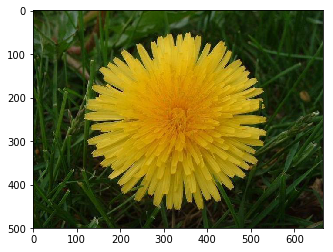

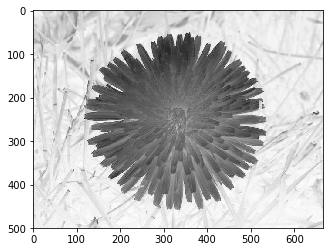

<function matplotlib.pyplot.show>

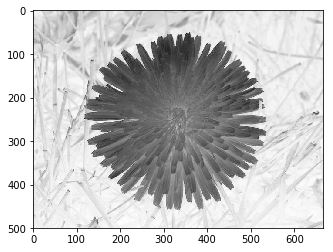

In [60]:
index = np.random.randint(0,X_test.shape[0])
print(X_test[index].shape)
plt.imshow(X_test[index])
plt.show()

#Converting using Model
grey = convert(X_test[index])
plt.imshow(grey,cmap='Greys')
plt.show()

#Converting using cv2
grey = y_test[index].reshape([y_test[index].shape[0],y_test[index].shape[1]])
plt.imshow(grey,cmap='Greys')
plt.show

In [ ]:
#so, basically use 